In [1]:
import os
os.environ['PROJ_LIB'] = r'C:\Users\regin\Anaconda3\pkgs\proj4-5.2.0-ha925a31_1\Library\share'
from netCDF4 import Dataset
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

In [2]:
my_nc_file = '/Users/regin/Desktop/R/S2Scalibrationextremeheat/loadeR/2t_201902_Mar_format.nc'
data = Dataset(my_nc_file, mode='r')
my_cal_file = '/Users/regin/Desktop/R/S2Scalibrationextremeheat/fcst_cal_CCR.nc'
fcst_data = Dataset(my_cal_file, mode='r')
obs_file = '/Users/regin/Desktop/R/S2Scalibrationextremeheat/loadeR/2t_era5_Mar_1993_2016_format.nc'
obs_data = Dataset(obs_file, mode='r')

In [3]:
lons = data.variables['lon'][:]
lats = data.variables['lat'][:]
tass = data.variables['tas'][:]
obs_tass = obs_data.variables['tas'][:]
fcst_tass = fcst_data.variables['tas'][:]
data.close()
obs_data.close()
fcst_data.close()
ens_mean = np.mean(tass, axis=(0,1))
cal_mean = np.mean(fcst_tass, axis=(0,1))
obs_mean = np.mean(obs_tass, axis=(0))
bias_raw = ens_mean - obs_mean
print(np.min(bias_raw))
print(np.max(bias_raw))
bias_cal = cal_mean - obs_mean
print(np.min(bias_cal))
print(np.max(bias_cal))

-3.0026855
1.6065674
-0.029907227
0.017211914


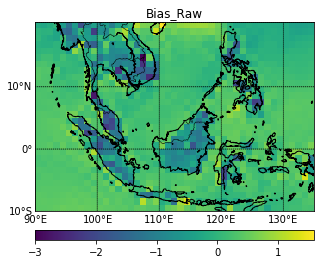

In [4]:
# Get some parameters for the Stereographic Projection
lon_0 = lons.mean()
lat_0 = lats.mean()

#m = Basemap(width=5000000,height=3500000,
#            resolution='l',projection='gnom',\
#            lat_ts=40,lat_0=lat_0,lon_0=lon_0)

m = Basemap(llcrnrlon=90, llcrnrlat=-10, 
            urcrnrlon=135,urcrnrlat=20,
            projection='merc', resolution = 'i',
            lon_0=lon_0, lat_0=lat_0)

# Because our lon and lat variables are 1D,
# use meshgrid to create 2D arrays
# Not necessary if coordinates are already in 2D arrays.
lon, lat = np.meshgrid(lons, lats)
xi, yi = m(lon, lat)

# Plot Data
cs = m.pcolor(xi,yi,np.squeeze(bias_raw))

# Add Grid Lines
m.drawparallels(np.arange(-10., 30., 10.), labels=[1,0,0,0], fontsize=10)
m.drawmeridians(np.arange(90., 150., 10.), labels=[0,0,0,1], fontsize=10)

# Add Coastlines, States, and Country Boundaries
m.drawcoastlines()
m.drawstates()
m.drawcountries()

# Add Colorbar
cbar = m.colorbar(cs, location='bottom', pad="10%")

# Add Title
plt.title('Bias_Raw')

plt.show()

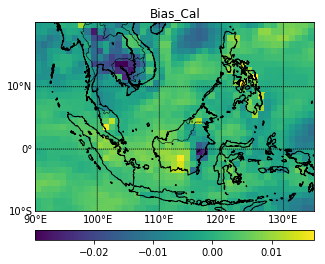

In [5]:
# Get some parameters for the Stereographic Projection
lon_0 = lons.mean()
lat_0 = lats.mean()

#m = Basemap(width=5000000,height=3500000,
#            resolution='l',projection='stere',\
#            lat_ts=40,lat_0=lat_0,lon_0=lon_0)

m = Basemap(llcrnrlon=90, llcrnrlat=-10, 
            urcrnrlon=135,urcrnrlat=20,
            projection='merc', resolution = 'i',
            lon_0=lon_0, lat_0=lat_0)

# Because our lon and lat variables are 1D,
# use meshgrid to create 2D arrays
# Not necessary if coordinates are already in 2D arrays.
lon, lat = np.meshgrid(lons, lats)
xi, yi = m(lon, lat)

# Plot Data
cs = m.pcolor(xi,yi,np.squeeze(bias_cal))

# Add Grid Lines
m.drawparallels(np.arange(-10., 30., 10.), labels=[1,0,0,0], fontsize=10)
m.drawmeridians(np.arange(90., 150., 10.), labels=[0,0,0,1], fontsize=10)

# Add Coastlines, States, and Country Boundaries
m.drawcoastlines()
m.drawstates()
m.drawcountries()

# Add Colorbar
cbar = m.colorbar(cs, location='bottom', pad="10%")

# Add Title
plt.title('Bias_Cal')

plt.show()